# This is our analysis workflow for the precisionFDA covid-19 challenge

The workflow has multiple components that can be modularized:

# Data Management
 - Access the input data (flat files)
 - Data modeling (SQLite)

# ETL
  - Data Loading
  
  - Data Inspection

  - Data Selection

  - Data Cleaning

# Data Analysis

# Data Ouput

# Input Data 

Data loading

In [1]:
# load library
library(RSQLite) # RSQLite package to connect to the SQLite database from ETL
library(data.table) # data table package for analyzing the data tables

# Getting data 

In [7]:
# getting the meta data
meta_data <- fread("metadata.csv") # read metadata
#seqtable <- fread("seq_table_head_M.csv") # read sequence table
subjects <- unique(meta_data$subject_id) # getting unique subject identifier

In [2]:
# create a connection to database containing the sequencing data 
#conn <- sqlite$connect('/home/teamcovid/Documents/Projects/precisionFDA_Covid19/fdacovid3.db')
meta_db_path <- "metadata.db"
meta_db_conn <- dbConnect(RSQLite::SQLite(), meta_db_path)

In [6]:
# get meta_data table
query_meta <- "SELECT sequence_id, junction_aa, sample_processing_id FROM meta_ limit  :x"
getdfRows(meta_db_conn, )

ERROR: Error: no such table: seqtable


In [16]:
# connection to seqtable
seq_db_path = '~/Documents/Projects/precisionFDA_Covid19/fdacovid3.db'
conn <- dbConnect(RSQLite::SQLite(), seq_db_path)

Select rows by disease_stage

In [60]:
# function that takes the SQLite database connection, a query selecting columns and
# user-identified rows
# the rows are found by specifying first and last row
getdfRows <- function(conn, query_rows, first_row, last_row){
    query_rows = 'SELECT sequence, sequence_id, junction_aa, junction_aa_length,
seqtable.sample_processing_id, metadata.subject_id, study_id, sex, 
disease_diagnosis, disease_stage, intervention 
FROM seqtable 
INNER JOIN metadata on metadata.sample_processing_id = seqtable.sample_processing_id
WHERE disease_stage = "Baseline" limit :x'
    df = dbGetQuery(conn,query_rows, params = list( x = c(first_row, last_row - first_row)))
    return(df)
}

In [87]:
# function that takes the SQLite database connection, a query selecting columns and
# user-identified rows
# the rows are found by specifying first and last row
getdfRows_all <- function(conn, query_rows, first_row, last_row){
    query_rows = 'SELECT *
FROM seqtable limit :x'
    df = dbGetQuery(conn,query_rows, params = list( x = c(first_row, last_row - first_row)))
    return(df)
}

In [36]:
query = 'SELECT  sequence_id, junction_aa, junction_aa_length,
seqtable.sample_processing_id, metadata.subject_id, study_id, sex, 
disease_diagnosis, disease_stage, intervention 
FROM seqtable 
INNER JOIN metadata on metadata.sample_processing_id = seqtable.sample_processing_id
WHERE disease_stage = "Baseline" limit 1'

In [61]:
df = getdfRows_all(conn, query, 1, 1000000)

In [96]:
df1 = getdfRows_all(conn, query, 1, 100000)

In [114]:
table(df1$)

[1] ""

In [93]:
setDT(df1)
melt(df1, id = "sequence_id")

sequence_id,variable,value
<chr>,<fct>,<chr>
5f4c1a0b3378361a5abf9e87,sequence,CAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTACTCTACGTCCTGGGCACTGAAGCTTTCTTTGGACAA
5f4c1a0b3378361a5abf9e87,sequence,CAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTACTCTACGTCCTGGGCACTGAAGCTTTCTTTGGACAA
5f4c1a0b3378361a5abf9e88,sequence,CAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTACTCTACGTCCTGGGCACTGAAGCTTTCTTTGGACAA
5f4c1a0b3378361a5abf9e89,sequence,CAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTACTCTACGTCCTGGGCACTGAAGCTTTCTTTGGACAA
5f4c1a0b3378361a5abf9e8a,sequence,CAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTACTCTACGTCCTGGGCACTGAAGCTTTCTTTGGACAA
5f4c1a0b3378361a5abf9e8b,sequence,CAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTACTCTACGTCCTGGGCACTGAAGCTTTCTTTGGACAA
5f4c1a0b3378361a5abf9e8c,sequence,CAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTACTCTACGTCCTGGGCACTGAAGCTTTCTTTGGACAA
5f4c1a0b3378361a5abf9e8d,sequence,CAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTACTCTACGTCCTGGGCACTGAAGCTTTCTTTGGACAA
5f4c1a0b3378361a5abf9e8e,sequence,CAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTACTCTACGTCCTGGGCACTGAAGCTTTCTTTGGACAA


In [ ]:
# 20210123


# Data Cleaning

In [63]:
# remove blank sequences
seq_meta_dt = df
setDT(seq_meta_dt)
seq_meta_dt_clean <- seq_meta_dt[junction_aa!=""]

Let's get some statistics about the sequences and the disease stages of patient ADIRP0000014

In [64]:
#clean
seq_meta_dt_1_clean_clean <- seq_meta_dt_clean[!grepl(pattern = "\\*",seq_meta_dt_clean$junction_aa),]

In [65]:
length(unique(seq_meta_dt_1_clean_clean$subject_id))


[1] 5

In [42]:
# subset by disease_stage; acute or "Recovered" or "Acute"
# input seq_meta_dt_1_clean_clean
fn_disease_stage <- function(disease_stage0){
seq_meta_dt_1_clean_clean_stage <- seq_meta_dt_1_clean_clean[disease_stage == disease_stage0]
    return(seq_meta_dt_1_clean_clean_stage)
}

In [43]:
#subset by patient 
dt_disease_stage_subject <- function(dt_disease_stage,subject_id_order){
    dt_disease_stage[subject_id == unique(dt_disease_stage$subject_id)[subject_id_order]]
    }

In [66]:
dt1 <- dt_disease_stage_subject(seq_meta_dt_1_clean_clean,1)

In [44]:
# Subset rows with the mode length of the junction_aa sequence
#function
seq_length <- function(dt_disease_stage,length){
seq <- dt_disease_stage$junction_aa[nchar(
    dt_disease_stage$junction_aa) == length]
    return(seq)
    }

In [67]:
dt1_10 <- seq_length(dt1,10)

# Data Analysis

In [47]:
library(universalmotif)

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 



In [53]:
dt1_14_motif <- create_motif(dt1_14)

In [68]:
dt1_10_motif <- create_motif(dt1_10)

Let's take a look at the sequence motifs. First, we will segment by length then we will perform sequence alignment

In [47]:
library(ggmsa)
library(universalmotif)

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 



In [70]:
# function create_motif
fn_motif <- function (stage,subject_order,length){create_motif(seq_length(
    dt_disease_stage_subject(
        fn_disease_stage(stage),subject_order), 
    length), alphabet = "AA")
                                                  }


In [72]:
motif_1 = fn_motif(stage = "Baseline", subject_order = 1, length = 14)

In [75]:
motif_10 = fn_motif(stage = "Baseline", subject_order = 1, length = 10)

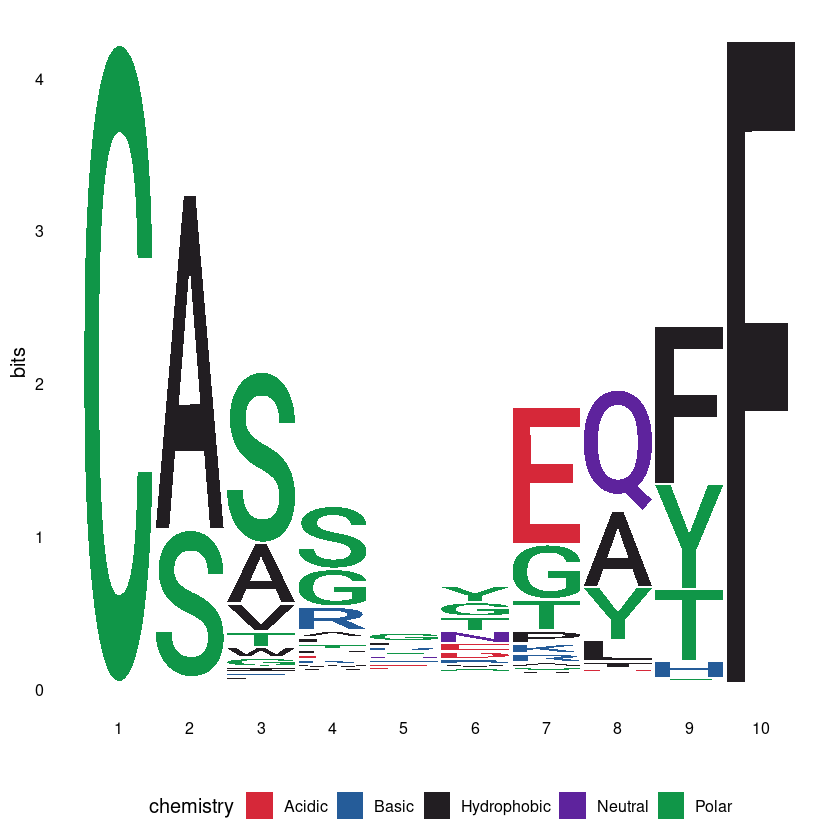

In [76]:
view_motifs(convert_type(motif_10, "PCM"))

In [79]:
median(seq_meta_dt_1_clean_clean[subject_id == unique(subject_id)[1]]$junction_aa_length)

Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
“argument is not numeric or logical: returning NA”


[1] NA

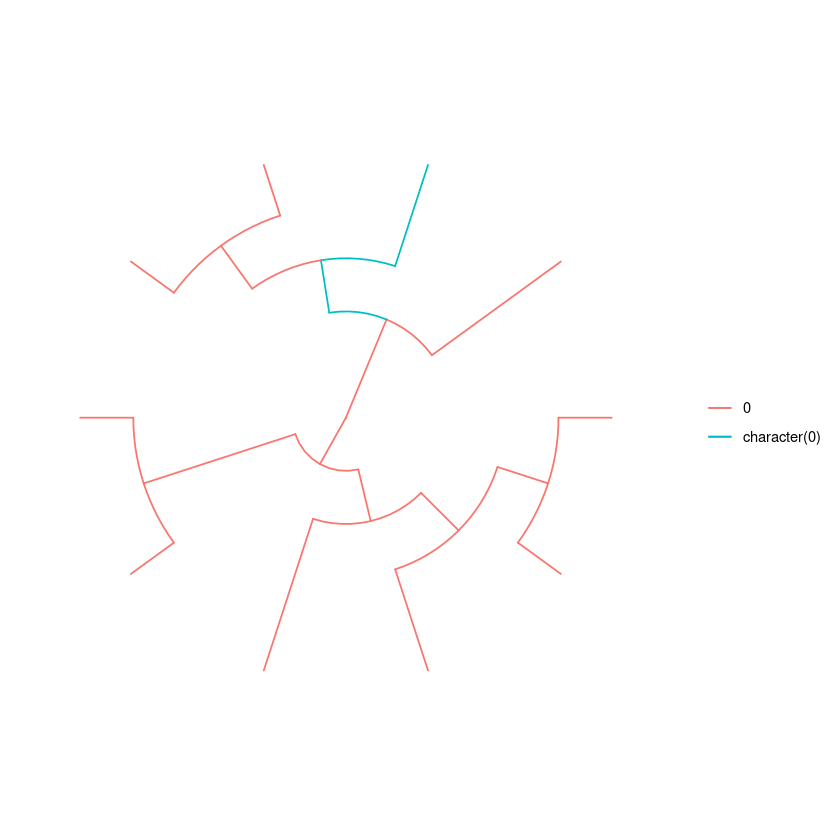

In [169]:
motif_tree(c(motif_1a,motif_1, motif_2, motif_3, motif_4,motif_5,motif_6,motif_7,motif_8,motif_9 ))

In [ ]:
compare_motifs(c(motif_recovered_14, motif_recovered_14_2), 1 )

In [117]:
pcm = convert_type(motif_recovered_14, "PCM")

In [118]:
pcm2 = convert_type(motif_recovered_14_2, "PCM")

In [119]:
pcm_acute = convert_type(motif_acute_14, "PCM")

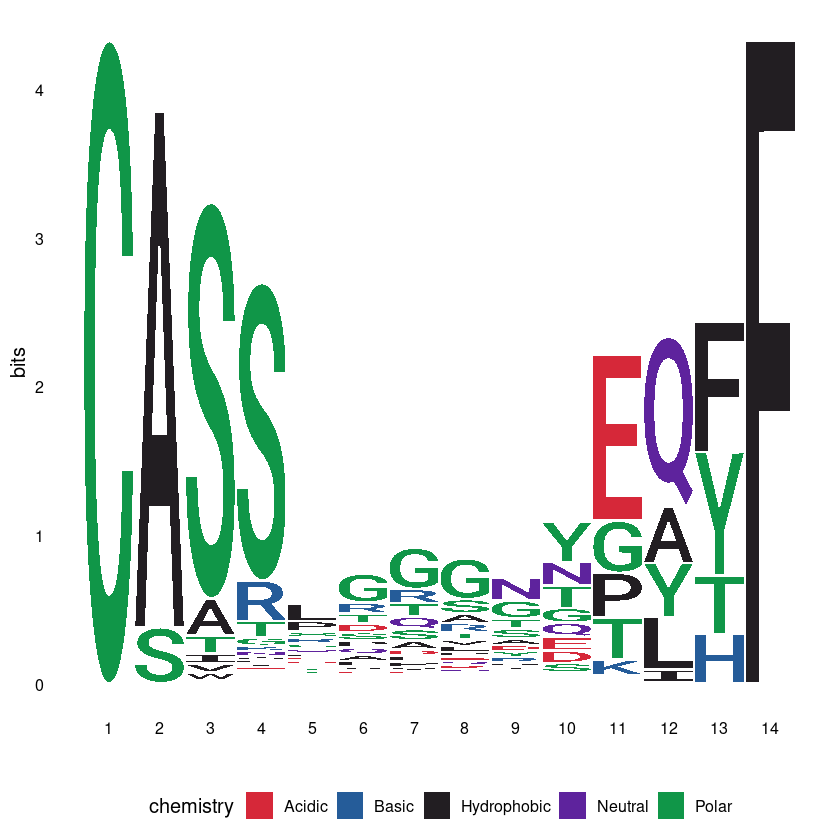

In [55]:
view_motifs(convert_type(dt1_14_motif, "PCM"))

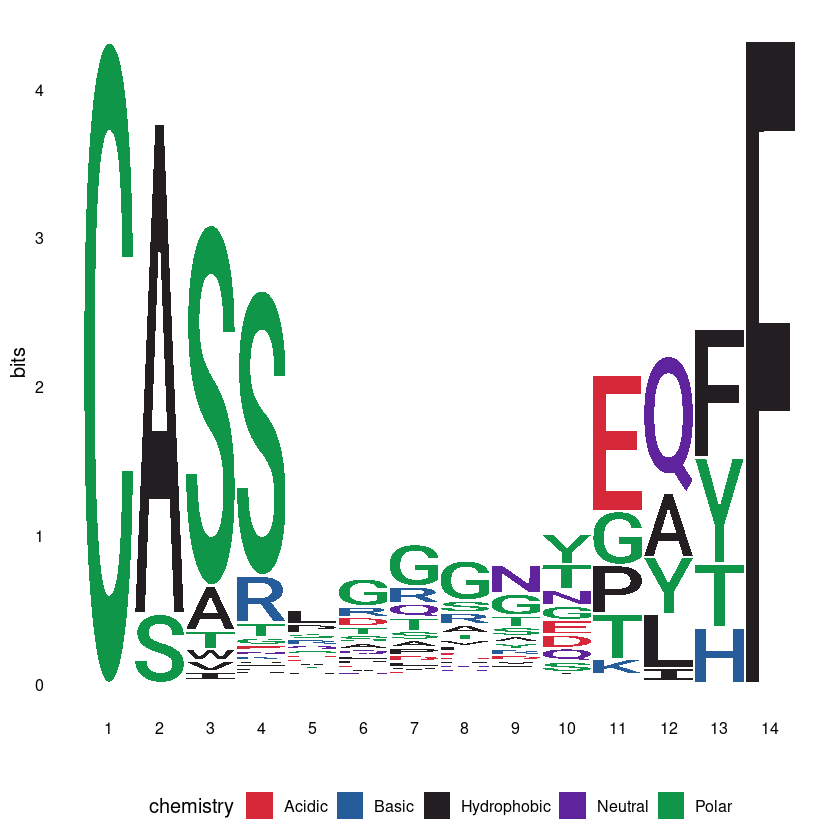

In [170]:
view_motifs(convert_type(motif_1, "PCM"))

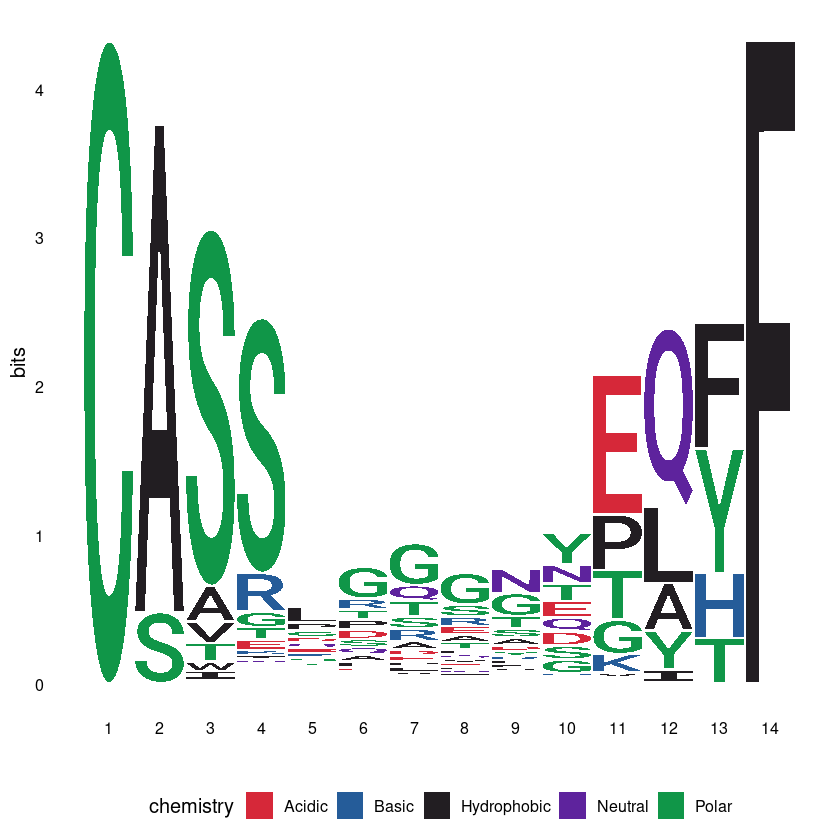

In [171]:
view_motifs(convert_type(motif_2, "PCM"))

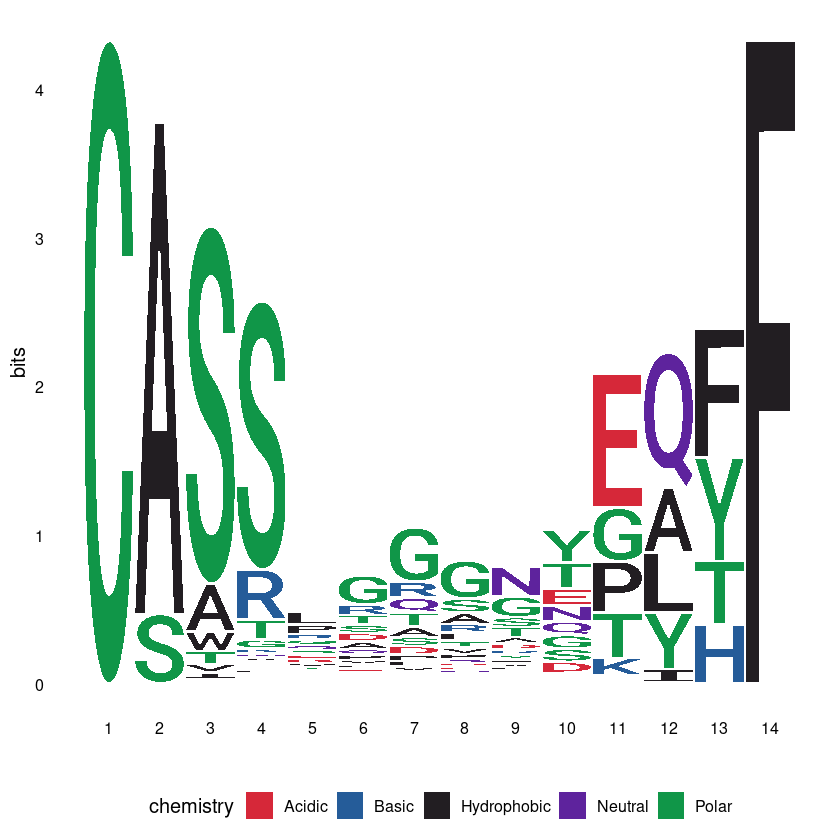

In [172]:
view_motifs(convert_type(motif_3, "PCM"))

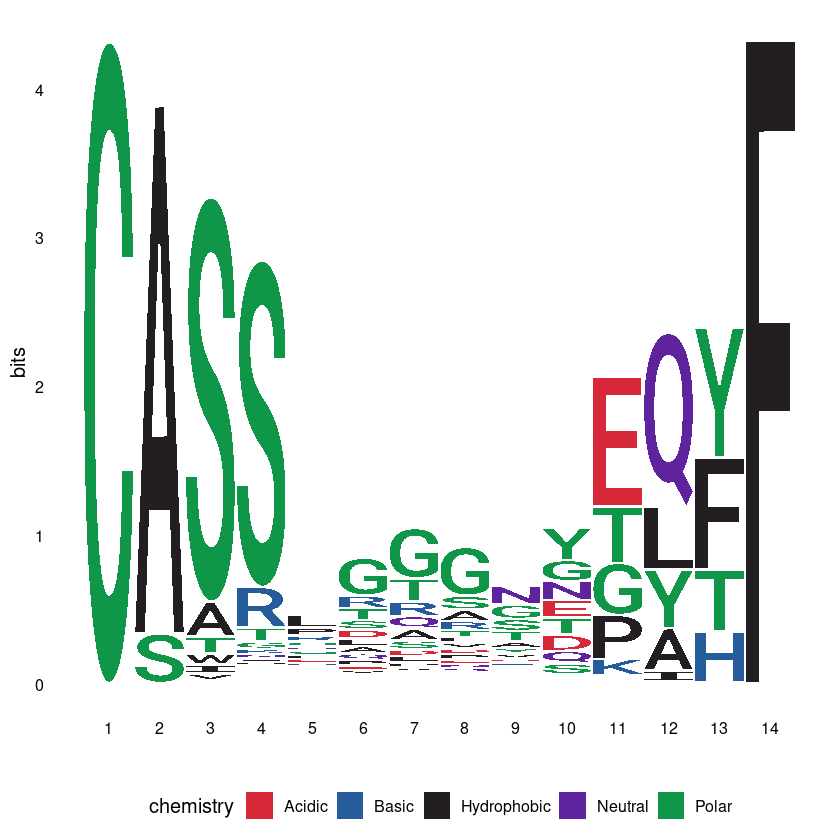

In [173]:
view_motifs(convert_type(motif_4, "PCM"))

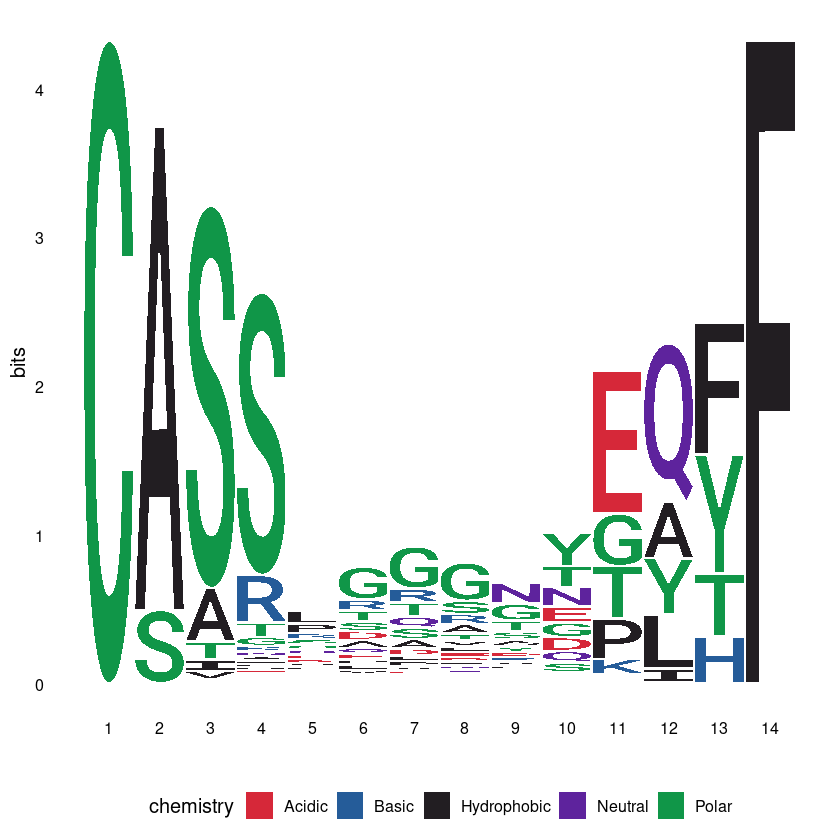

In [174]:
view_motifs(convert_type(motif_5, "PCM"))

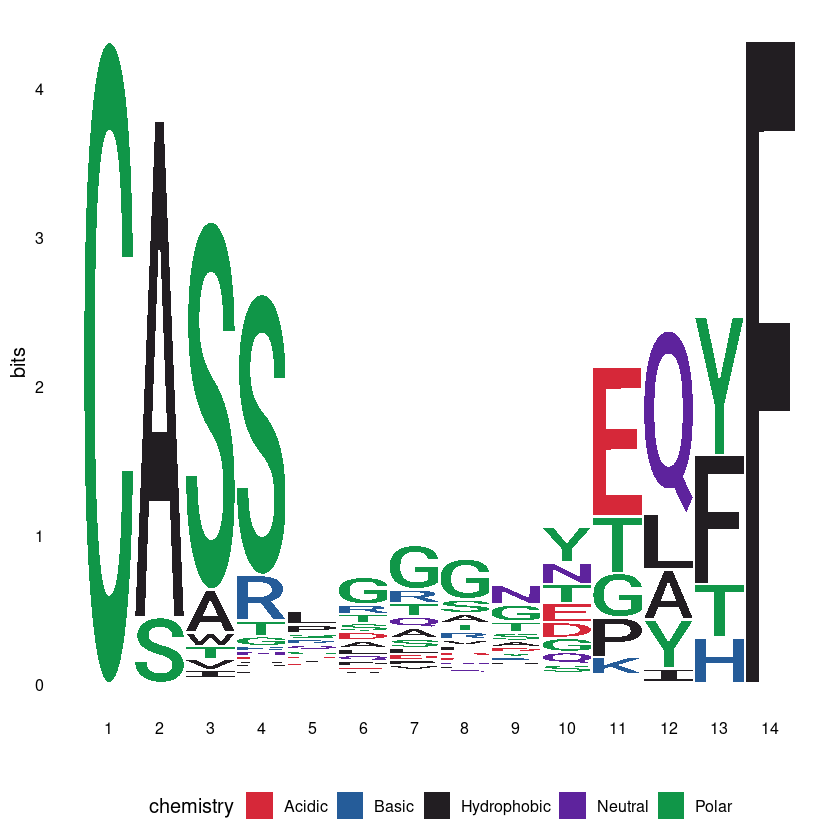

In [175]:
view_motifs(convert_type(motif_6, "PCM"))

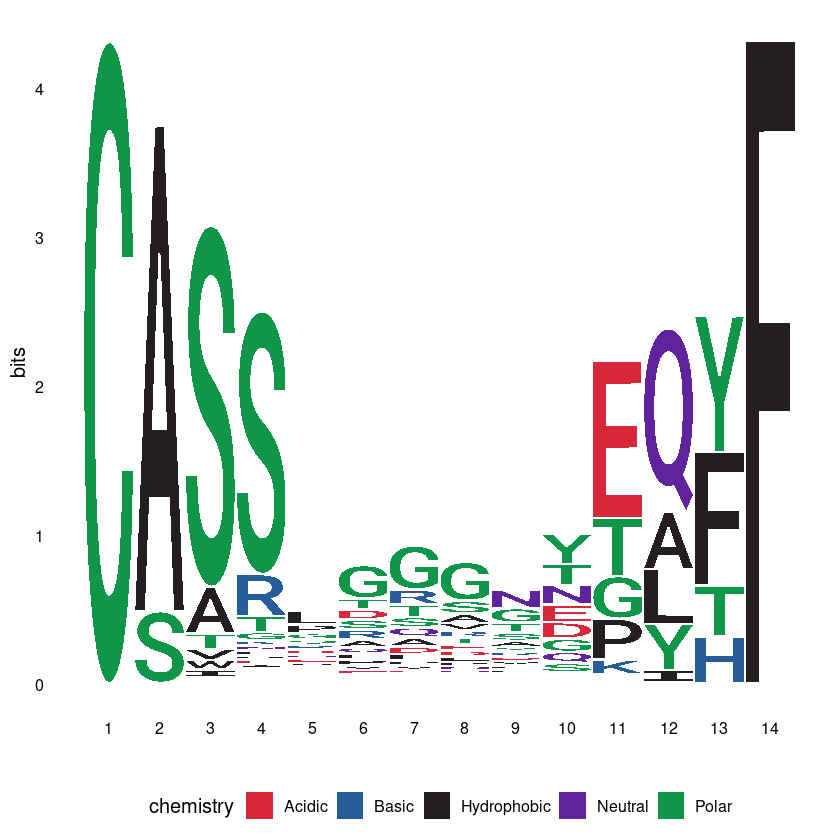

In [176]:
view_motifs(convert_type(motif_7, "PCM"))

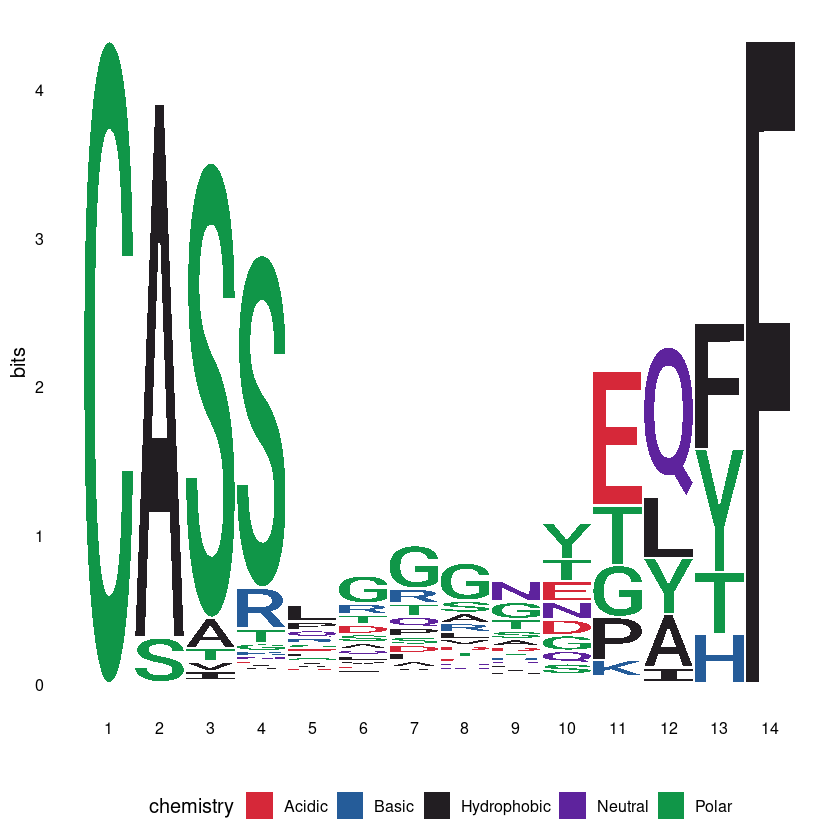

In [177]:
view_motifs(convert_type(motif_8, "PCM"))

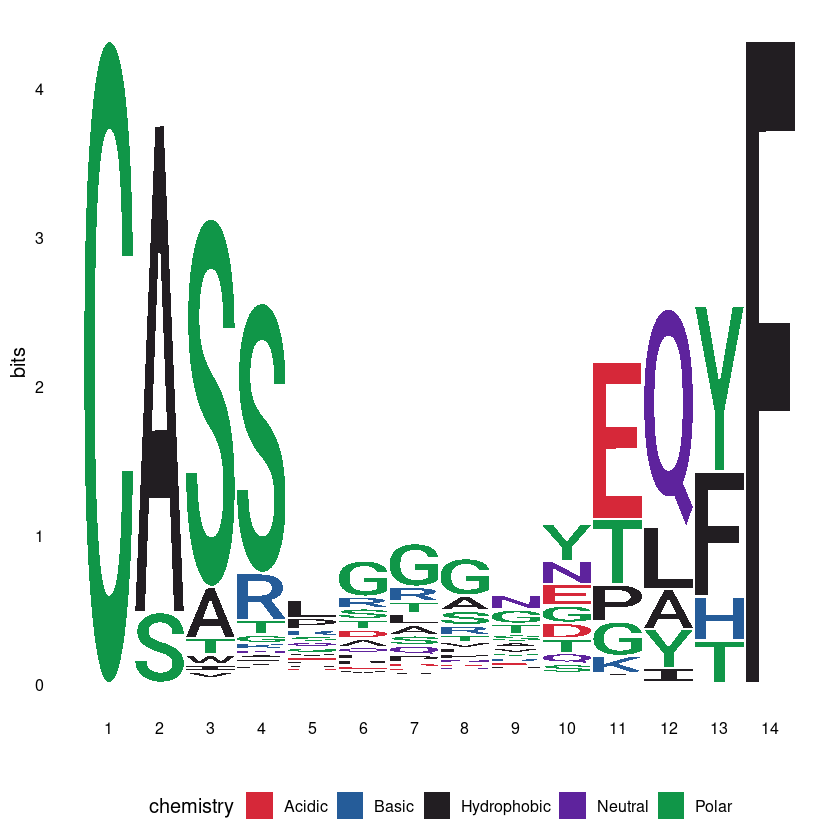

In [178]:
view_motifs(convert_type(motif_9, "PCM"))

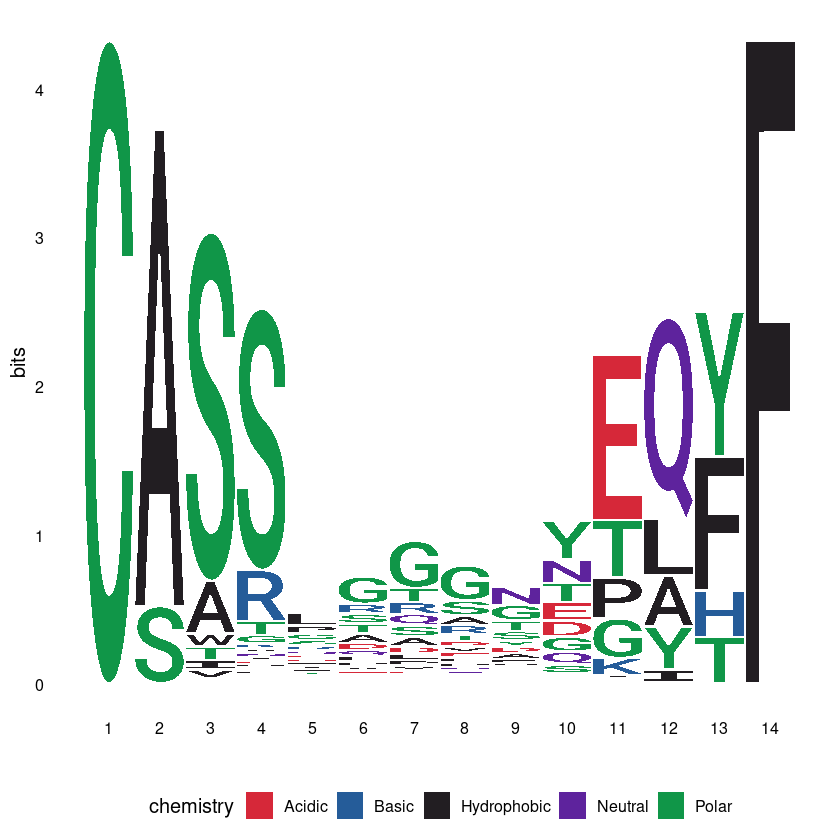

In [179]:
view_motifs(convert_type(motif_1a, "PCM"))

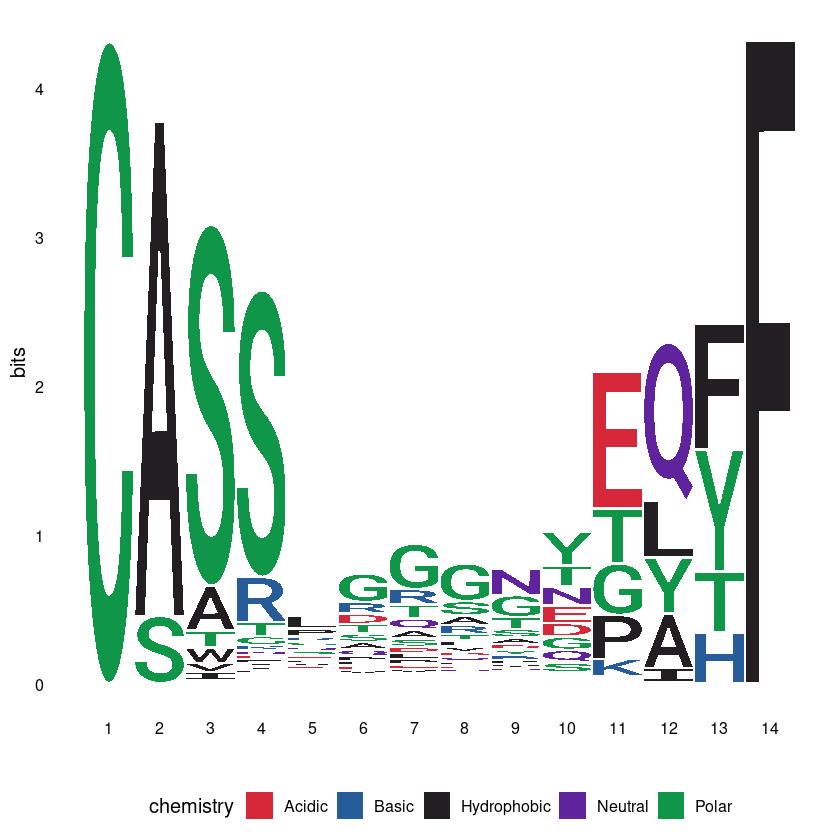

In [180]:
view_motifs(convert_type(motif_2a, "PCM"))

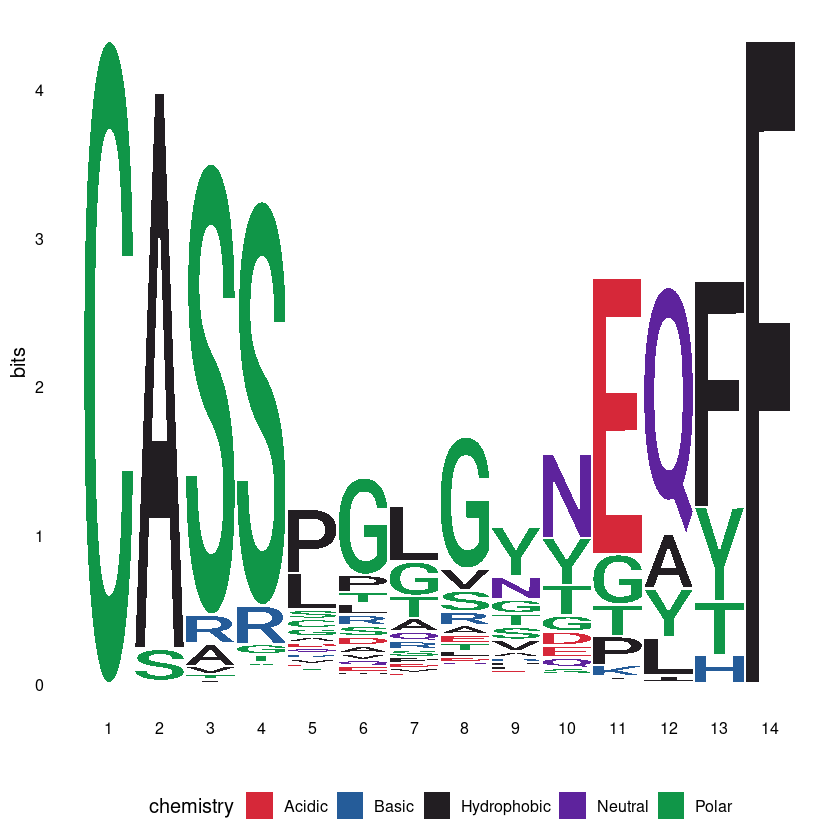

In [181]:
view_motifs(convert_type(motif_3a, "PCM"))

#Notes
For all
Pos 1-4 ; conserved
Pos 13: conserved
# Pos
11-13 variable
: quantitative metric averaged by group to confirm null-hypothesis

In [182]:
getwd()

[1] "/home/teamcovid/Documents/Projects/PrecisionFDA/gitdir/precisionFDA_Covid19/git/precisionFDA_Covid19"

In [ ]:
view_motifs(convert_type(motif_8, "PCM"))

In [ ]:
view_motifs(convert_type(motif_8, "PCM"))

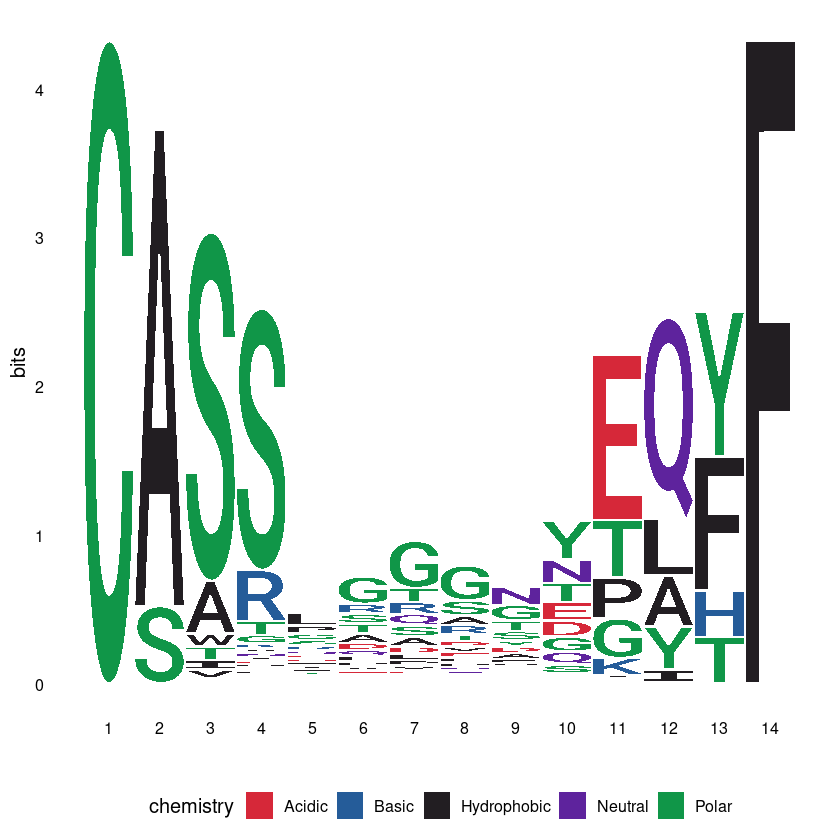

In [123]:
view_motifs(pcm_acute)

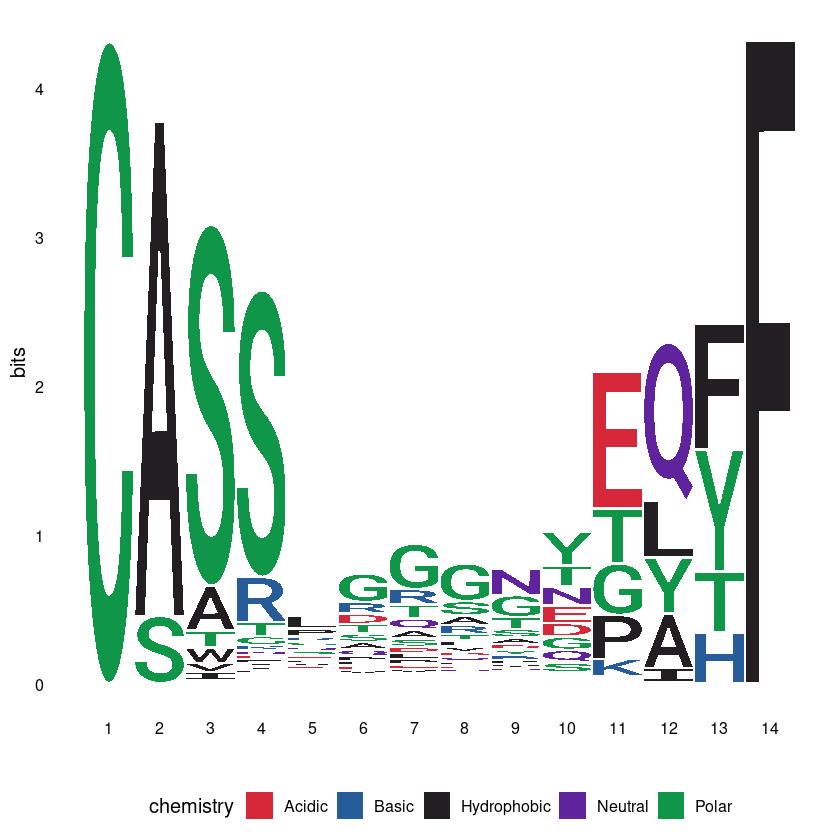

In [124]:
view_motifs(pcm_acute_2)

In [19]:
# perform sequence alignment with msa
library(msa)

Loading required package: Biostrings

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, whi

In [21]:
library(seqinr)


Attaching package: ‘seqinr’


The following object is masked from ‘package:Biostrings’:

    translate


The following object is masked from ‘package:dplyr’:

    count




In [ ]:
# remove duplicates
seq_meta_dt_1_clean_clean_unique <- seq_meta_dt_1_clean_clean[order(-junction_aa)][!duplicated(junction_aa)]

In [45]:
# save first 100 lines to fasta file called file.out
write.fasta(strsplit(seq_meta_dt_1_clean_clean_unique$junction_aa[1:1000],''), seq_meta_dt_1_clean_clean_unique$sequence_id[1:1000], './file.out', open = "w", nbchar = 20,  as.string = F)

In [289]:
strsplit(seq_meta_dt_1_clean_clean_unique$junction_aa[1:25],'')

[[1]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[2]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[3]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[4]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[5]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[6]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[7]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[8]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[9]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[10]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

In [47]:
# read the fasta file
mySequenceFile <- system.file("examples", "exampleAA.fasta", package="msa") # package example
mySequences <- readAAStringSet(mySequenceFile)
junction_seq <- readAAStringSet('./file.out')


In [48]:
junction_seq

  A AAStringSet instance of length 1000
       width seq                                            names               
   [1]     7 YYDEQFF                                        5f4c1d393378361a5...
   [2]     6 YVEAFF                                         5f4c1ce03378361a5...
   [3]    16 YSWTSGETSTLNTQYF                               5f4c1bbf3378361a5...
   [4]    16 YSVEDLASRMGETQYF                               5f4c1bbf3378361a5...
   [5]    17 YSSSWSILQSRANVLTF                              5f4c1bbf3378361a5...
   ...   ... ...
 [996]    12 CSVWGSGTEAFF                                   5f4c1bbf3378361a5...
 [997]    12 CSVWGQGYGYTF                                   5f4c1cdf3378361a5...
 [998]    14 CSVWGLDWGTEAFF                                 5f4c1bbf3378361a5...
 [999]    12 CSVWGGTDTQYF                                   5f4c1bbe3378361a5...
[1000]    15 CSVWGGGPSSYEQYF                                5f4c1ce03378361a5...

In [49]:
junction_seq_msa = msa(junction_seq)

use default substitution matrix


In [50]:
junction_seq_msa

CLUSTAL 2.1  

Call:
   msa(junction_seq)

MsaAAMultipleAlignment with 1000 rows and 55 columns
       aln                                                 names
   [1] -----------CSVWTL-------...--------G-WYGYT-------F- 5f4c1b303378361a5...
   [2] -----------CSVWT--------...--------G-NYGYT-------F- 5f4c1ce03378361a5...
   [3] -----------CSVYTG-------...--------GPNYGYT-------F- 5f4c1b303378361a5...
   [4] -----------CSVYKQ-------...--------G-AYGYT-------F- 5f4c1b303378361a5...
   [5] -----------CSVYDVSR-----...--------GSGYGYT-------F- 5f4c1c4a3378361a5...
   [6] -----------CSVYDLT------...--------G-GVSYT-------F- 5f4c1b303378361a5...
   [7] ------------SVF---------...------------------------ 5f4c1aa53378361a5...
   [8] -----------CSVWTGG------...--------D---GYT-------F- 5f4c1c4a3378361a5...
   [9] -----------CSVWTGG------...--------D---GYT-------F- 5f4c1b303378361a5... 
   ... ...
 [993] ----------RASS----CLYVGT...-----------ELFF--------- 5f4c1ce03378361a5...
 [994] ----------RASS----SQ

In [51]:
motif_x <- create_motif(junction_seq_msa, alphabet = "AA")

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘create_motif’ for signature ‘"MsaAAMultipleAlignment"’
